# Triple Exponential Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\AirPassenger.csv")
data.head(3)

,Date,Passenger
0,01-01-1949,112
1,01-02-1949,118
2,01-03-1949,132


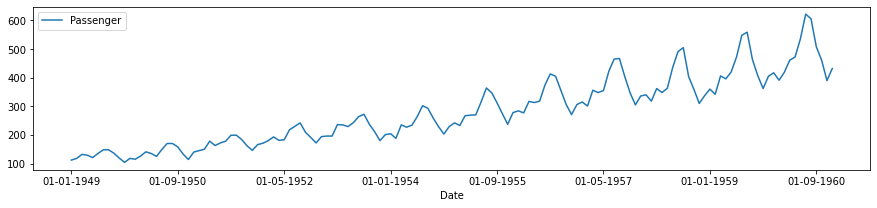

In [3]:
data.plot.line(x = 'Date',y = 'Passenger',figsize=(15,3))
plt.show()  # Trend , Seasonal

In [4]:
data2=data.set_index("Date")
data2.head()

,Passenger
Date,
01-01-1949,112
01-02-1949,118
01-03-1949,132
01-04-1949,129
01-05-1949,121


abc=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93])

#### Auto Model

In [5]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params
          # initial_seasons=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.318576371803696,
 'smoothing_trend': 5.380954242859452e-08,
 'smoothing_seasonal': 0.6013457302289144,
 'damping_trend': nan,
 'initial_level': 102.54484051507897,
 'initial_trend': 2.4111368439877503,
 'initial_seasons': array([1.06149954, 1.11635748, 1.23277036, 1.17598123, 1.09782071,
        1.1988954 , 1.30367509, 1.28767073, 1.17398358, 1.02414035,
        0.90691178, 1.03870969]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [6]:
model2.fittedvalues

Date
01-01-1949    111.410722
01-02-1949    120.057513
01-03-1949    134.825567
01-04-1949    130.591416
01-05-1949    124.085481
                 ...    
01-08-1960    625.008333
01-09-1960    506.744673
01-10-1960    443.213166
01-11-1960    393.493614
01-12-1960    432.351121
Length: 144, dtype: float64

In [7]:
df = pd.DataFrame(
    np.c_[data.Passenger, model2.level, model2.trend, model2.season,model2.fittedvalues],
    columns=["Actual","Level","Trend","Seasonal","Forecast"])
df

,Actual,Level,Trend,Seasonal,Forecast
0,112.0,105.132831,2.411137,1.064876,111.410722
1,118.0,106.956813,2.411137,1.104853,120.057513
2,132.0,108.637758,2.411137,1.217234,134.825567
3,129.0,110.617776,2.411137,1.167363,130.591416
4,121.0,112.133538,2.411137,1.081405,124.085481
...,...,...,...,...,...
139,606.0,430.276423,2.411136,1.412192,625.008333
140,508.0,433.029032,2.411136,1.172901,506.744673
141,461.0,441.007256,2.411137,1.042415,443.213166
142,390.0,442.164199,2.411137,0.882671,393.493614


### Future Forecast 

In [8]:
Forecast2 = model2.forecast(24)
Forecast2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


144    445.242477
145    418.225362
146    465.309892
147    494.950481
148    505.475429
149    573.312196
150    663.595482
151    654.903174
152    546.760046
153    488.445975
154    415.723073
155    460.377330
156    474.070644
157    445.158926
158    495.115726
159    526.486629
160    537.512080
161    609.457385
162    705.214037
163    695.763025
164    580.696332
165    518.606824
166    441.261970
167    488.515399
dtype: float64

#### Forecast Plot

<AxesSubplot:xlabel='Date'>

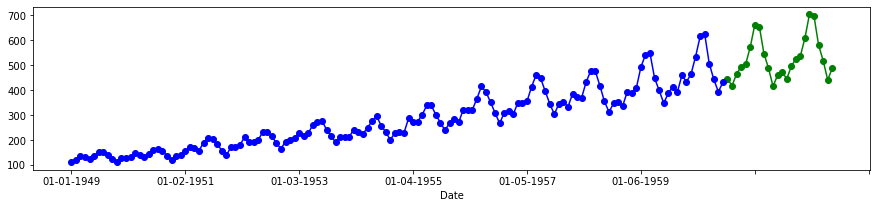

In [9]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [10]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,Passenger,Forecast
Date,,
01-01-1949,112,111.410722
01-02-1949,118,120.057513
01-03-1949,132,134.825567
01-04-1949,129,130.591416
01-05-1949,121,124.085481


#### Accuracy of Model

In [11]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Passenger - data2.Forecast)/np.abs(data2.Passenger))*100
mean_absolute_percentage_error

3.0839272502163118

# Finished 